**1. Чтение данных из файла**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import pandas as pd
csv_path = '/content/drive/My Drive/ИАД/train.csv'
x = pd.read_csv(csv_path)
del x['Id']
x 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

**2. Удаление ненужных стобцов**

In [ ]:
# выбор истинных значений
y = x.get('SalePrice')
x = x.drop('SalePrice', axis=1)

In [ ]:
# в этих столбцах одни NaN, поэтому их удаляем
x.drop(labels=["Alley","PoolQC","Fence","MiscFeature"], axis=1, inplace=True)
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal


**3. Замена NaN на наиболее часто стречающиеся значения**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
x[x.columns] = SimpleImputer(strategy="most_frequent").fit_transform(x[x.columns])
df = pd.DataFrame(x)
x = df.apply(preprocessing.LabelEncoder().fit_transform)

x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,36,327,1,3,3,0,4,0,5,2,2,0,5,6,4,104,53,1,1,12,13,1,128,2,4,2,2,3,3,2,361,5,0,73,179,1,0,1,4,134,232,0,531,1,0,2,1,3,1,2,6,6,0,2,1,89,1,2,220,4,4,2,0,49,0,0,0,0,0,1,2,8,4
1,0,3,51,498,1,3,3,0,2,0,24,1,2,0,2,5,7,77,26,1,1,8,8,2,0,3,4,1,2,3,1,0,482,5,0,167,441,1,0,1,4,427,0,0,259,0,1,2,0,3,1,3,4,6,1,4,1,62,1,2,149,4,4,2,187,0,0,0,0,0,0,4,1,8,4
2,5,3,39,702,1,0,3,0,4,0,5,2,2,0,5,6,4,102,52,1,1,12,13,1,104,2,4,2,2,3,2,2,222,5,0,278,214,1,0,1,4,178,239,0,570,1,0,2,1,3,1,2,4,6,1,4,1,87,1,2,260,4,4,2,0,30,0,0,0,0,0,8,2,8,4
3,6,3,31,489,1,0,3,0,0,0,6,2,2,0,5,6,4,19,20,1,1,13,15,2,0,3,4,0,3,1,3,0,66,5,0,346,117,1,2,1,4,208,180,0,536,1,0,1,0,3,1,2,5,6,1,2,5,84,2,3,284,4,4,2,0,24,108,0,0,0,0,1,0,8,0
4,5,3,55,925,1,0,3,0,2,0,15,2,2,0,5,7,4,101,50,1,1,12,13,1,221,2,4,2,2,3,0,2,328,5,0,318,370,1,0,1,4,347,320,0,734,1,0,2,1,4,1,2,7,6,1,4,1,86,1,3,380,4,4,2,118,70,0,0,0,0,0,11,2,8,4


**4. Нормализация данных**

In [ ]:
def normalize_data(data):
  mean = data.mean(axis=0)
  std = data.std(axis=0)
  data -= mean
  data /= std
  return data

  
x_norm = normalize_data(x)
x_norm.head()
# перевод данных к "нормальным" значениям

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.200281,-0.045516,-0.154108,-0.549026,0.064216,0.750473,0.314559,-0.026171,0.604463,-0.225639,-1.205801,-0.036277,-0.031729,-0.41155,1.026338,0.651256,-0.517023,1.075290,0.878367,-0.491347,-0.125754,0.742838,0.751369,-1.241024,0.784162,-0.777709,0.364083,0.835313,-0.324041,0.280952,0.628696,-0.429771,0.780188,0.30721,-0.305057,-1.106830,-0.617087,-0.123004,-0.884355,0.263722,0.3023,-0.944656,1.212165,-0.114562,0.621770,1.107431,-0.240978,0.789470,1.227165,0.165354,-0.211381,-0.409229,0.913976,0.25589,-0.950901,-0.429882,-0.686541,0.939768,-0.281790,0.311618,0.443729,0.215572,0.185955,0.289646,-0.748781,0.279022,-0.352127,-0.114478,-0.254941,-0.06203,-0.161962,-1.598563,0.138730,0.31376,0.208431
1,-1.001078,-0.045516,0.632964,0.019611,0.064216,0.750473,0.314559,-0.026171,-0.628101,-0.225639,1.953633,-1.187667,-0.031729,-0.41155,-0.543271,-0.071812,2.178881,0.139491,-0.429430,-0.491347,-0.125754,-0.508077,-0.660833,0.386914,-0.647116,0.663224,0.364083,-0.548974,-0.324041,0.280952,-1.128044,-1.518177,1.378954,0.30721,-0.305057,-0.692339,0.703255,-0.123004,-0.884355,0.263722,0.3023,0.473539,-0.700323,-0.114562,-0.534735,-0.819684,3.947457,0.789470,-0.761360,0.165354,-0.211381,0.795356,-0.318731,0.25589,0.600289,1.791811,-0.686541,-0.173215,-0.281790,0.311618,-0.166310,0.215572,0.185955,0.289646,1.845208,-0.744106,-0.352127,-0.114478,-0.254941,-0.06203,-0.161962,-0.488943,-0.614228,0.31376,0.208431
2,0.200281,-0.045516,0.003306,0.697984,0.064216,-1.378460,0.314559,-0.026171,0.604463,-0.225639,-1.205801,-0.036277,-0.031729,-0.41155,1.026338,0.651256,-0.517023,1.005972,0.829930,-0.491347,-0.125754,0.742838,0.751369,-1.241024,0.515798,-0.777709,0.364083,0.835313,-0.324041,0.280952,-0.249674,-0.429771,0.092350,0.30721,-0.305057,-0.202887,-0.440705,-0.123004,-0.884355,0.263722,0.3023,-0.731684,1.269869,-0.114562,0.787593,1.107431,-0.240978,0.789470,1.227165,0.165354,-0.211381,-0.409229,-0.318731,0.25589,0.600289,1.791811,-0.686541,0.857324,-0.281790,0.311618,0.787413,0.215572,0.185955,0.289646,-0.748781,-0.117701,-0.352127,-0.114478,-0.254941,-0.06203,-0.161962,0.990552,0.138730,0.31376,0.208431
3,0.440553,-0.045516,-0.416465,-0.010318,0.064216,-1.378460,0.314559,-0.026171,-1.860664,-0.225639,-1.039515,-0.036277,-0.031729,-0.41155,1.026338,0.651256,-0.517023,-1.870743,-0.720051,-0.491347,-0.125754,1.055567,1.316250,0.386914,-0.647116,0.663224,0.364083,-1.933261,0.832683,-2.791627,0.628696,-1.518177,-0.679612,0.30721,-0.305057,0.096957,-0.929534,-0.123004,0.265385,0.263722,0.3023,-0.586477,0.783504,-0.114562,0.643030,1.107431,-0.240978,-1.025689,-0.761360,0.165354,-0.211381,-0.409229,0.297623,0.25589,0.600289,-0.429882,1.586361,0.733660,0.949987,1.649742,0.993623,0.215572,0.185955,0.289646,-0.748781,-0.242982,4.282540,-0.114478,-0.254941,-0.06203,-0.161962,-1.598563,-1.367186,0.31376,-3.425110
4,0.200281,-0.045516,0.842850,1.439539,0.064216,-1.378460,0.314559,-0.026171,-0.628101,-0.225639,0.457059,-0.036277,-0.031729,-0.41155,1.026338,1.374324,-0.517023,0.971313,0.733056,-0.491347,-0.125754,0.742838,0.751369,-1.241024,1.824075,-0.777709,0.364083,0.835313,-0.324041,0.280952,-2.006414,-0.429771,0.616888,0.30721,-0.305057,-0.026508,0.345452,

**5. Деление данных на тренировочные и тестовые**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.3, random_state = 2)

**6. Создание модели**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model_HandMade = Sequential()
model_HandMade.add(Dense(5000, activation="relu", input_shape=(x_train.shape[1],)))
model_HandMade.add(Dropout(0.3)) #чтобы убрать возможность переобучения
model_HandMade.add(Dense(1200, activation="relu"))
model_HandMade.add(Dense(600, activation="relu"))
model_HandMade.add(Dense(158, activation="relu"))
model_HandMade.add(Dense(1))
model_HandMade.compile(optimizer="adam", loss="mse", metrics=["mae"])
model_HandMade.summary()
history = model_HandMade.fit(x_train, y_train, epochs=50, batch_size=20, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5000)              380000    
_________________________________________________________________
dropout (Dropout)            (None, 5000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1200)              6001200   
_________________________________________________________________
dense_2 (Dense)              (None, 600)               720600    
_________________________________________________________________
dense_3 (Dense)              (None, 158)               94958     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 159       
Total params: 7,196,917
Trainable params: 7,196,917
Non-trainable params: 0
______________________________________________

**7. Создание графиков тренировки**

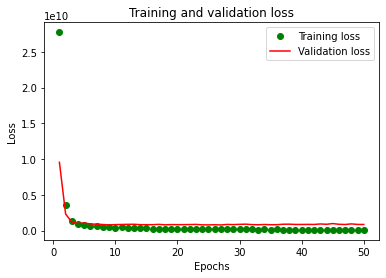

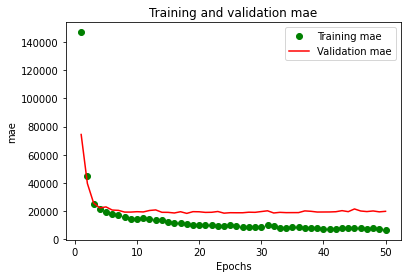

In [ ]:
import matplotlib.pyplot as plt

history = history.history
# функция рисования графиков
def draw_graph(history):
    loss_values = history["loss"]
    validation_loss_values = history["val_loss"]

    epochs = range(1, len(history['loss']) + 1)

    plt.plot(epochs, loss_values, 'og', label='Training loss')
    plt.plot(epochs, validation_loss_values, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plt.clf()
    acc_values = history['mae']
    validation_acc_values = history['val_mae']
    plt.plot(epochs, acc_values, 'og', label='Training mae')
    plt.plot(epochs, validation_acc_values, 'r', label='Validation mae')
    plt.title('Training and validation mae')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

draw_graph(history)

**8. Предсказание на модели**

In [ ]:
predicted_y = model_HandMade.predict(x_test)

**9. Перевод в одномерные векторы**

In [ ]:
import numpy as np
y_test = np.reshape(y_test, (y_test.shape[0]))
predicted_y = np.reshape(predicted_y, (predicted_y.shape[0]))

**10. Вывод реальных и предсказанных значений**

In [ ]:
y_test = y_test.astype("float64")
predicted_y = predicted_y.astype("float64")
for y1, y2 in zip(y_test, predicted_y):
  print(f"true  {y1} predicted  {y2}")

true  289000.0 predicted  285874.78125
true  178000.0 predicted  154310.625
true  359100.0 predicted  275246.78125
true  197000.0 predicted  205508.390625
true  224000.0 predicted  217508.09375
true  221000.0 predicted  195918.546875
true  227000.0 predicted  209436.875
true  201000.0 predicted  180750.25
true  84500.0 predicted  127263.0390625
true  315000.0 predicted  406643.875
true  215000.0 predicted  232643.609375
true  207000.0 predicted  201433.203125
true  118000.0 predicted  124048.2734375
true  147000.0 predicted  159038.1875
true  105000.0 predicted  109097.015625
true  225000.0 predicted  214860.90625
true  287000.0 predicted  279187.5
true  284000.0 predicted  307946.9375
true  240000.0 predicted  266165.375
true  285000.0 predicted  294889.0625
true  310000.0 predicted  367703.40625
true  172500.0 predicted  160148.875
true  174000.0 predicted  152659.890625
true  222000.0 predicted  248461.5625
true  438780.0 predicted  490567.5625
true  260400.0 predicted  223395.01562

**11. Коэффициент корелляции**

In [ ]:
СС = np.corrcoef(predicted_y, y_test)
СС = СС[0][1]
print(f'My model Correlation Coefficient: {СС}')
# насколько схожи предсказания и реальность

My model Correlation Coefficient: 0.8624352547835812


In [ ]:
! rm -rf untitled_project/

**12. Подбор модели с Keras Tuner**

In [ ]:
!pip install -U keras-tuner
from kerastuner.tuners import RandomSearch, Hyperband
from kerastuner.engine import hyperparameters

def create_model(hp):
  #функция создания модели с гиперпараметрами
  model = Sequential()
  activation_choice = hp.Choice("activation", values=['relu', 'selu', 'elu'])
  model.add(Dense(units=hp.Int("units_input", min_value=32,max_value=1024, step=32), activation=activation_choice, input_shape=(x_train.shape[1], )))
  model.add(Dropout(0.3))
  for i in range(hp.Choice('hidden_layers', values=[1,2,3])):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',min_value=32//(i+1), max_value=512//(i+1), step=64//(i+1)), activation=activation_choice))
  model.add(Dense(1))
  model.compile(optimizer='rmsprop', loss="mse", metrics=["mae"])
  model.summary()
  return model


def search_best_model(x_train_norm, y_train):
  #поиск модели с помощью hyperband
  tuner = Hyperband(create_model, objective="loss", max_epochs=10, hyperband_iterations=3)
  tuner.search(x_train, y_train, batch_size=300, epochs=1, validation_split=0.2)
  tuner.results_summary()
  print("\n\n\nfound best model:\n\n\n")
  best_params = tuner.get_best_hyperparameters()[0]
  best_model = tuner.hypermodel.build(best_params)
  best_model.summary()
  return best_model
  

best_model = search_best_model(x_train, y_train)


Trial 90 Complete [00h 00m 01s]
loss: 37907902464.0

Best loss So Far: 36292870144.0
Total elapsed time: 00h 02m 01s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='loss', direction='min')
Trial summary
Hyperparameters:
activation: elu
units_input: 864
hidden_layers: 2
layer_0_units_: 480
layer_1_units_: 176
layer_2_units_: 31
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 36292870144.0
Trial summary
Hyperparameters:
activation: elu
units_input: 512
hidden_layers: 2
layer_0_units_: 480
layer_1_units_: 240
layer_2_units_: 73
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 36927385600.0
Trial summary
Hyperparameters:
activation: relu
units_input: 704
hidden_layers: 2
layer_0_units_: 352
layer_1_units_: 144
layer_2_units_: 52
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 36959707136.0
Trial summary
Hyperparameters:
activ

**13. Тренировка лучшей модели**

In [ ]:
history = best_model.fit(x_train, y_train, epochs=200, batch_size=16, validation_split=0.2)
best_history = history.history

Epoch 1/200
52/52 [==============================] - 1s 8ms/step - loss: 35753474550.3396 - mae: 174380.4387 - val_loss: 33904211968.0000 - val_mae: 170817.8281
Epoch 2/200
52/52 [==============================] - 0s 4ms/step - loss: 30358647363.6226 - mae: 162921.2863 - val_loss: 18377146368.0000 - val_mae: 129401.7969
Epoch 3/200
52/52 [==============================] - 0s 4ms/step - loss: 14790118148.8302 - mae: 111497.7017 - val_loss: 12311891968.0000 - val_mae: 97042.7109
Epoch 4/200
52/52 [==============================] - 0s 4ms/step - loss: 9875340780.6792 - mae: 85176.1617 - val_loss: 11160890368.0000 - val_mae: 91666.2422
Epoch 5/200
52/52 [==============================] - 0s 4ms/step - loss: 8374570196.5283 - mae: 76898.8774 - val_loss: 9926771712.0000 - val_mae: 85125.5000
Epoch 6/200
52/52 [==============================] - 0s 4ms/step - loss: 8049222076.3774 - mae: 72711.6810 - val_loss: 8695304192.0000 - val_mae: 77730.8672
Epoch 7/200
52/52 [===========================

СОЗДАНИЕ ГРАФИКОВ ПО РЕЗУЛЬТАТАМ ТРЕНИРОВКИ ЛУЧШЕЙ МОДЕЛИ

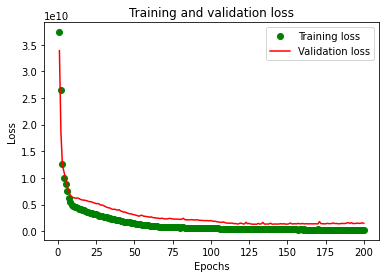

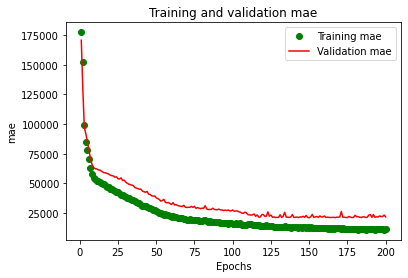

In [ ]:
draw_graph(best_history)

**14. Предсказание на модели тюнера**

In [ ]:
predicted_y_tuner = best_model.predict(x_test)
predicted_y_tuner = np.round(predicted_y_tuner, 0)

In [ ]:
predicted_y_tuner = np.reshape(predicted_y_tuner, (predicted_y_tuner.shape[0]))

In [ ]:
СС_tuner = np.corrcoef(predicted_y_tuner, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Tuner model Correlation Coefficient: {СС_tuner}')

Tuner model Correlation Coefficient: 0.8406978533592372
